## Homework 2: Image Features

**Problem 1 (TBD pts): Image Compression using DFT**

- Compute the DFT of the “Mines” image provided in the homework material.
- Display both DFT magnitude and phase (as images).
- Compress the image by keeping the top 1000 DFT coefficients (in magnitude).
- Display the DFT magnitude image that contains the top 1000 DFT coefficients.
- Reconstruct the original image by using only the top 1000 DFT coefficients (via inverse DFT).
- Display the resulting reconstructed image.
- Answer: How many elements/pixels does the original image have? How many elements does the DFT compression have? What is the compression ratio?

**Notes:**

- For this problem, you can use any existing DFT function/library.
- See the example in lecture "03_2_Fourier_Transform_II."


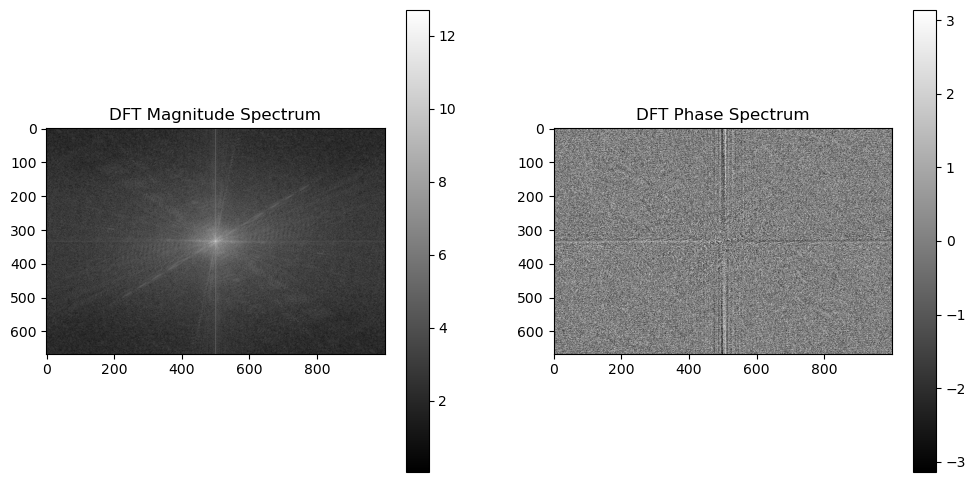

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io

image = io.imread('mines.png', as_gray=True)

dft = fft2(image)
dft_shifted = fftshift(dft)

magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)
phase_spectrum = np.angle(dft_shifted)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('DFT Phase Spectrum')
plt.colorbar()
plt.show()


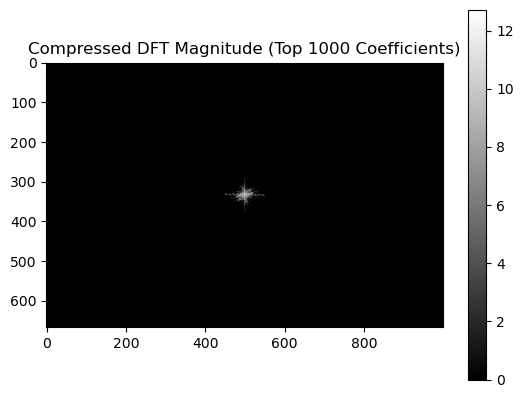

In [66]:
flattened_dft = np.abs(dft_shifted).flatten()
indices = np.argsort(flattened_dft)[-1000:]  # Top 1000 indices

compressed_dft = np.zeros_like(dft_shifted)
flat_dft_shifted = dft_shifted.flatten()
compressed_dft_flat = np.zeros_like(flat_dft_shifted)
compressed_dft_flat[indices] = flat_dft_shifted[indices]
compressed_dft = compressed_dft_flat.reshape(dft_shifted.shape)

compressed_magnitude_spectrum = np.log(np.abs(compressed_dft) + 1)

plt.figure()
plt.imshow(compressed_magnitude_spectrum, cmap='gray')
plt.title('Compressed DFT Magnitude (Top 1000 Coefficients)')
plt.colorbar()
plt.show()



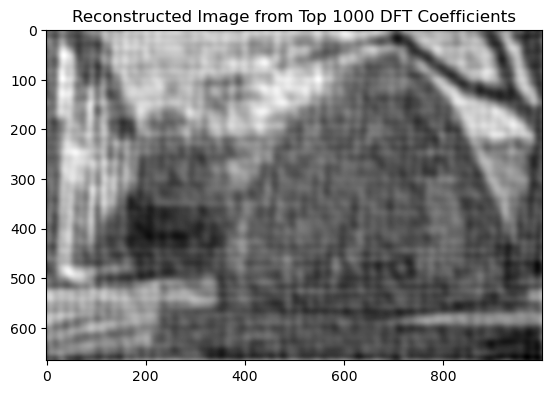

In [67]:
compressed_dft_ishifted = ifftshift(compressed_dft)
reconstructed_image = np.abs(ifft2(compressed_dft_ishifted))

plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image from Top 1000 DFT Coefficients')
plt.show()



In [68]:
original_pixels = image.size

compressed_elements = 1000  

compression_ratio = original_pixels / compressed_elements

print(f"Original image size: {original_pixels} pixels")
print(f"Compressed image size: {compressed_elements} DFT coefficients")
print(f"Compression ratio: {compression_ratio:.2f}")


Original image size: 666000 pixels
Compressed image size: 1000 DFT coefficients
Compression ratio: 666.00


**Problem 2 (tbd pts): Simple Canny Edge Detector**
- Filter the Mines image with derivatives of Gaussian filters to find its 𝑥𝑥 and 𝑦𝑦 gradients 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦: 
  -  Create a Gaussian filter kernel of 𝜎 = 1.4 with appropriate size  
  - Display the Gaussian filter kernel as an image 
  - Convolve the Gaussian kernel with 1D derivate filter kernels along the 𝑥𝑥 and 𝑦𝑦 directions 
to obtain derivative of Gaussian kernels 
  - Display both 𝑥𝑥 and 𝑦𝑦 derivative of Gaussian kernels as images 
  - Filter the Mines image with derivative of Gaussian filters to obtain 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 
  - Display 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 
- Compute the magnitude and orientation (theta) of gradient  
- Display both magnitude and orientation of gradient as images 
- Remove pixels in the magnitude image that are below a certain threshold (pick the threshold 
appropriately to keep edges) 
- Display the resulting edge image

**Notes:**  
- The size of the Gaussian filter kernel should be large enough so that the pixels on the edge of 
the kernel image are close to zero 
- See the examples in lectures “04_1_Edge_Detection” and “04_2_Edge_Detection_II” 

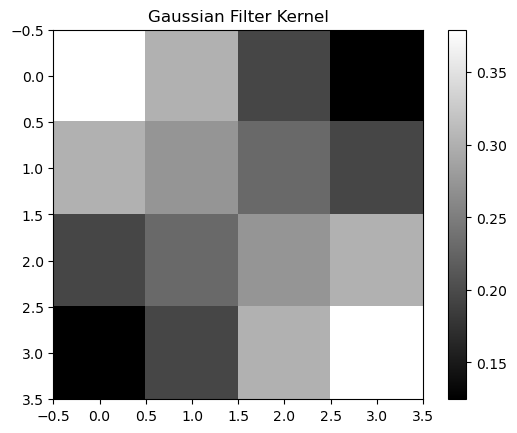

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, convolve1d
from skimage import io, color

image = io.imread('mines.png', as_gray=True)

sigma = 1.4
size = int(3 * sigma)
gaussian_kernel = gaussian_filter(np.eye(size), sigma=sigma)


plt.figure()
plt.imshow(gaussian_kernel, cmap='gray')
plt.title('Gaussian Filter Kernel')
plt.colorbar()
plt.show()



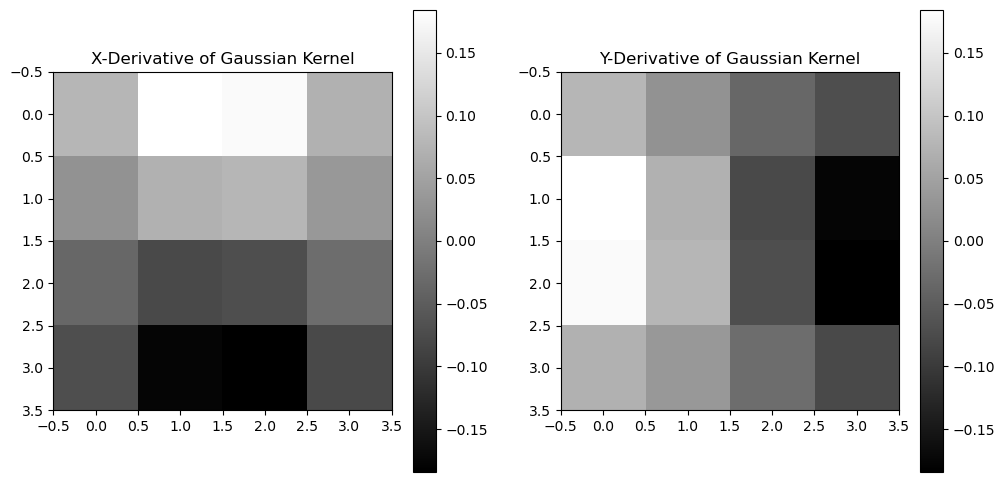

In [70]:
dx = np.array([-1, 0, 1]) 
dy = np.array([[-1], [0], [1]])

gaussian_deriv_x = convolve1d(gaussian_kernel, dx, axis=1)
gaussian_deriv_y = convolve1d(gaussian_kernel, dy.flatten(), axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_deriv_x, cmap='gray')
plt.title('X-Derivative of Gaussian Kernel')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(gaussian_deriv_y, cmap='gray')
plt.title('Y-Derivative of Gaussian Kernel')
plt.colorbar()
plt.show()




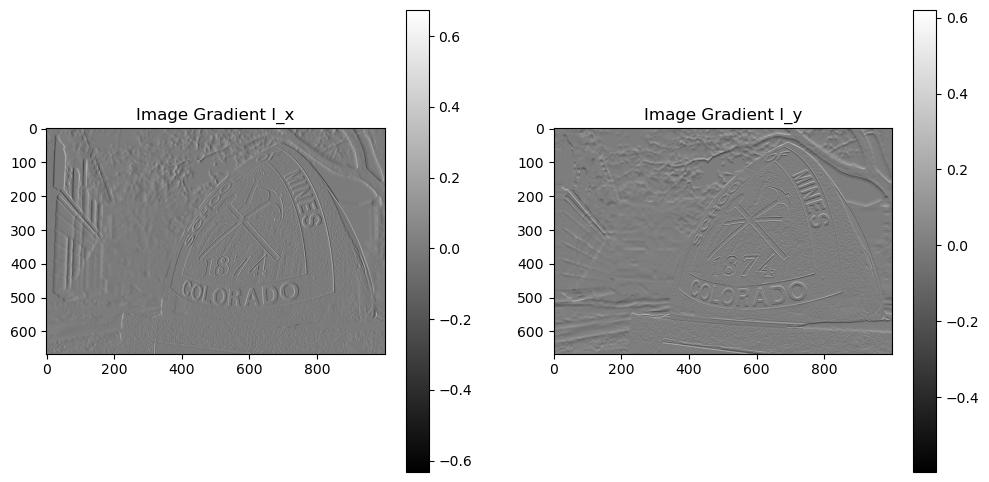

In [71]:
I_x = convolve1d(image, dx, axis=1)
I_y = convolve1d(image, dy.flatten(), axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_x, cmap='gray')
plt.title('Image Gradient I_x')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I_y, cmap='gray')
plt.title('Image Gradient I_y')
plt.colorbar()
plt.show()



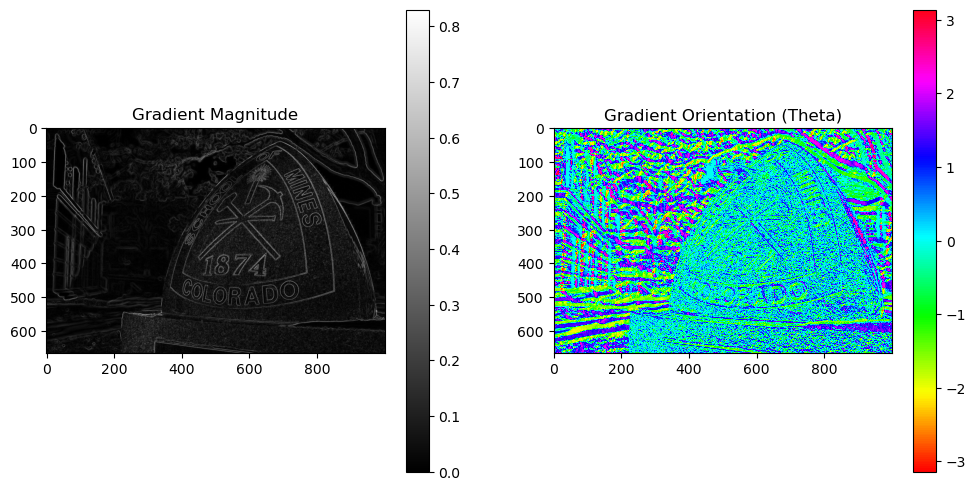

In [72]:
gradient_magnitude = np.sqrt(I_x**2 + I_y**2)
gradient_orientation = np.arctan2(I_y, I_x)  

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(gradient_orientation, cmap='hsv')  
plt.title('Gradient Orientation (Theta)')
plt.colorbar()
plt.show()



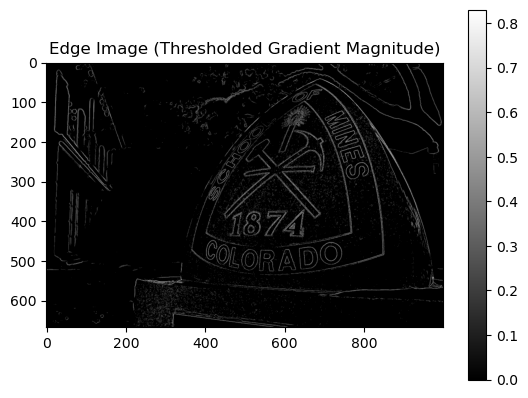

In [102]:
threshold = np.percentile(gradient_magnitude, 90)  
edge_image = np.copy(gradient_magnitude)
edge_image[edge_image < threshold] = 0 

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Image (Thresholded Gradient Magnitude)')
plt.colorbar()
plt.show()

**Problem 3 (tbd pts): Harris Corner Detector** 
- Use the Mines image as input and compute its gradients 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 via convolving the image with the 
Sobel filters (of appropriate kernel size) 
- Display 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 and their Hadamard product 𝐼𝐼𝑥𝑥∘  𝐼𝐼𝑦𝑦 as images 
- Compute the “cornerness” score 𝐶𝐶 using only 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦, and 𝐼𝐼𝑥𝑥∘  𝐼𝐼𝑦𝑦 and 𝛼𝛼 = 0.04 (see lecture 
material) 
- Display 𝐶𝐶 as an image 
- Threshed 𝐶𝐶 to pick high cornerness pixels AND display the results as an image 
- Use non-maximum suppression (with appropriate threshold) to pick corners as individual pixels  
- Display the corners as an image (with black background) AND display them overlapped on the 
original image 

**Notes:**  
- For this problem, you cannot use any existing Harris corner detector implementation 
- For non-maximum suppression, you can search the neighboring pixels of a target pixel (e.g., 
pixels in a 5x5 box centered at the target pixel) and keep the target pixel only if it has an 
intensity larger than all of its neighbors. 
- See the examples and algorithm in lecture “05_1_Features”

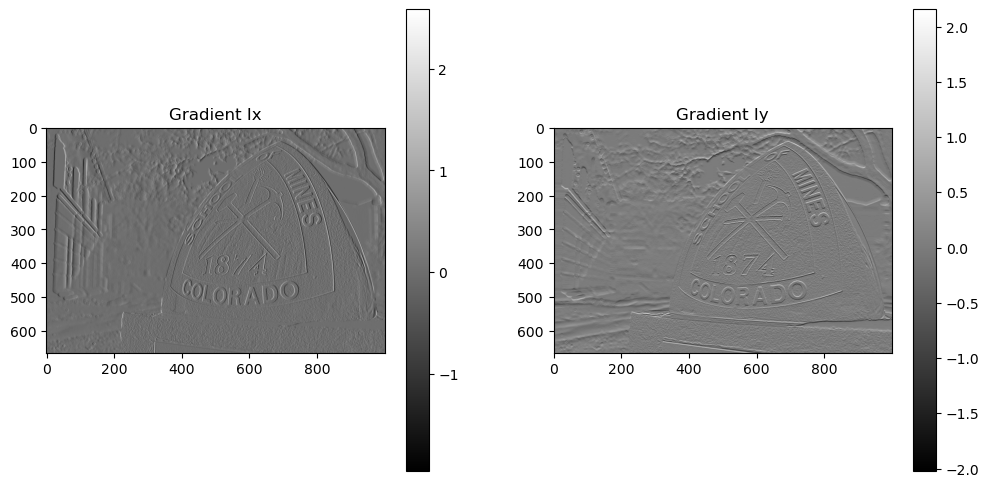

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, color

image = io.imread('mines.png', as_gray=True)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]) 

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]]) 

Ix = convolve(image, sobel_x)
Iy = convolve(image, sobel_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap='gray')
plt.title('Gradient Ix')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap='gray')
plt.title('Gradient Iy')
plt.colorbar()
plt.show()



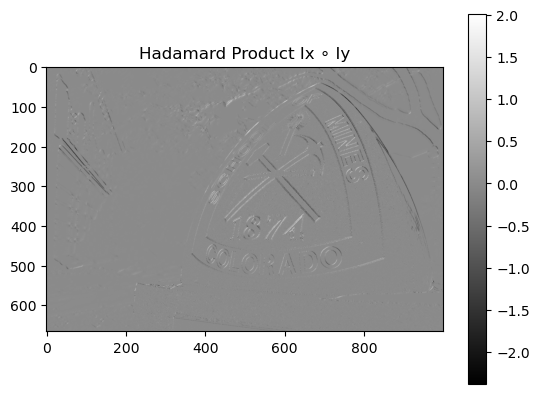

In [75]:
IxIy = Ix * Iy

plt.figure()
plt.imshow(IxIy, cmap='gray')
plt.title('Hadamard Product Ix ∘ Iy')
plt.colorbar()
plt.show()



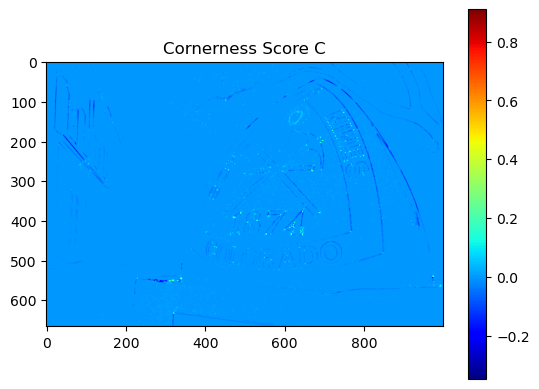

In [76]:
alpha = 0.04

Ix2 = Ix ** 2
Iy2 = Iy ** 2

window_size = 3
window = np.ones((window_size, window_size)) / (window_size ** 2)

Ix2_smoothed = convolve(Ix2, window)
Iy2_smoothed = convolve(Iy2, window)
IxIy_smoothed = convolve(IxIy, window)

det_M = (Ix2_smoothed * Iy2_smoothed) - (IxIy_smoothed ** 2)
trace_M = Ix2_smoothed + Iy2_smoothed

C = det_M - alpha * (trace_M ** 2)

plt.figure()
plt.imshow(C, cmap='jet')
plt.title('Cornerness Score C')
plt.colorbar()
plt.show()



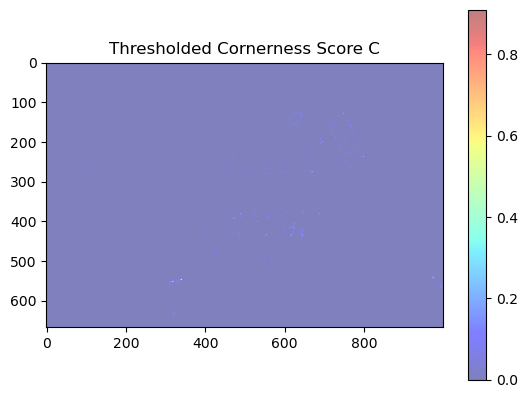

In [107]:
threshold_C = np.percentile(C, 99)  
C_thresholded = np.copy(C)
C_thresholded[C_thresholded < threshold_C] = 0

plt.figure()
plt.imshow(C_thresholded, cmap='jet', alpha=0.5)
plt.title('Thresholded Cornerness Score C')
plt.colorbar()
plt.show()




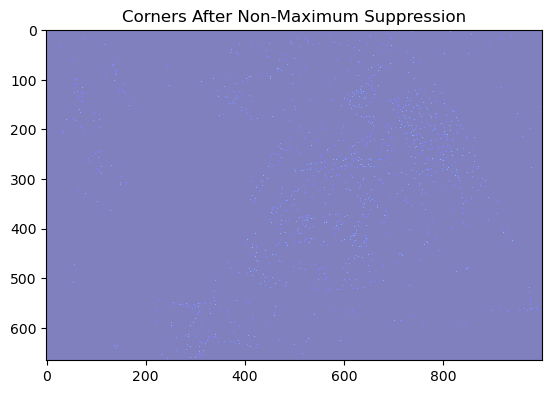

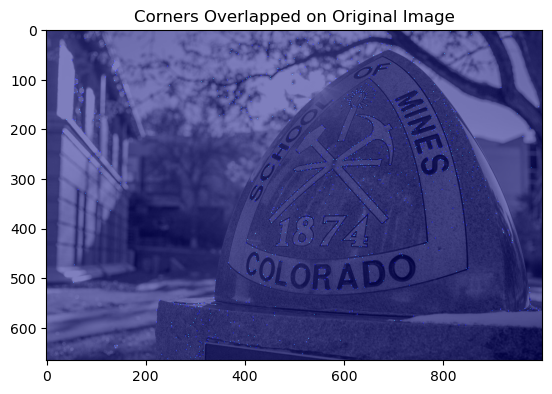

In [109]:
def non_maximum_suppression(image, window_size=5):
    half_window = window_size // 2
    suppressed_image = np.zeros_like(image)
    
    for i in range(half_window, image.shape[0] - half_window):
        for j in range(half_window, image.shape[1] - half_window):
            local_region = image[i-half_window:i+half_window+1, j-half_window:j+half_window+1]
            if image[i, j] == np.max(local_region):
                suppressed_image[i, j] = image[i, j]
    
    return suppressed_image

C_nms = non_maximum_suppression(C_thresholded)

plt.figure()
plt.imshow(C_nms > 0, cmap='jet',alpha=0.5)
plt.title('Corners After Non-Maximum Suppression')
plt.show()

plt.figure()
plt.imshow(image, cmap='gray')
plt.imshow(C_nms > 0, cmap='jet', alpha=0.5)  
plt.title('Corners Overlapped on Original Image')
plt.show()

**Problem 4: SIFT Features** 
In this problem, you will implement a SIFT-like algorithm (we will ignore scale). Use an existing Harris 
corner detector (e.g., from OpenCV or Scikit packages) and extract Harris corners in the image named 
“image1” provided in homework material. Adjust the corner detector parameters to get at least 50 
corners.  
- Compute image gradients 𝐼𝐼𝑥𝑥, 𝐼𝐼𝑦𝑦 via convolving the image with Sobel filters (of appropriate kernel 
size), and use them to compute magnitude and orientation of gradient for each pixel. 
- For each corner:
 
  - In a 16x16 window around the corner, compute gradient orientation histogram. To 
achieve this, use a histogram with 36 bins, each covering 10 degrees, to encompass 0 to 
360 degrees. 
  - Find the dominant orientation, and normalize orientations by rotating them so that the 
dominant orientation is in the first bin. 
  - Create a SIFT descriptor using the (rotated) 16x16 window. That is, use 16 sub-blocks of 
4x4 size. For each sub-block, create an 8-bin orientation histogram. Stack the histogram 
values of all sub-blocks so that a 128-element descriptor vector is created. 
  - Normalized the descriptor (to the range 0-1). Clamp all vector values > 0.2 to 0.2, and 
re-normalize. 
- For only one of the corners: 
  - Display the gradient orientation histogram and print the dominant orientation 
  - Re-compute & display the gradient orientation histogram after rotation 
  - Display the 8-bin orientation histogram for each sub-block (we have 4x4 sub-blocks, so a 
total of 16 histograms) 
  - Print out the 128-element descriptor vector constructed from the histograms 
  - Print out the normalize descriptor, and re-normalized descriptor 
Note: 
- You cannot use any existing implementations of the SIFT algorithm. 
- You can ignore the features around the edge of the image where the 16x16 window falls outside 
of the image. 
- You can normalize a descriptor vector (to the range 0-1) by dividing the vector by its max 
element. 
- See the details in lecture “06_1_Feature_Matching”.

In [110]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image1 = cv.imread('image1.jpg', cv.IMREAD_GRAYSCALE)

def harris_corner_detection(image, threshold=0.05):
    dst = cv.cornerHarris(image, 2, 3, 0.04)
    dst = cv.dilate(dst, None)
    corners = np.argwhere(dst > threshold * dst.max())
    return corners

corners = harris_corner_detection(image1)

Ix = cv.Sobel(image1, cv.CV_64F, 1, 0, ksize=3)
Iy = cv.Sobel(image1, cv.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(Ix**2 + Iy**2)
orientation = np.arctan2(Iy, Ix) * (180.0 / np.pi) % 360


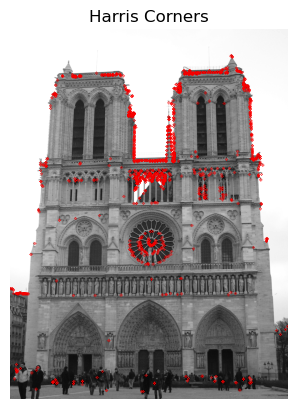

In [113]:
plt.imshow(image1, cmap='gray')
y_corners, x_corners = zip(*corners)  
plt.scatter(x_corners, y_corners, c='red', s=.005)  

plt.title('Harris Corners')
plt.axis('off') 
plt.show()

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_75316/1213562536.py:36: RuntimeWarning: invalid value encountered in divide
  descriptor = descriptor / np.linalg.norm(descriptor)  # First normalization


Original Gradient Orientation Histogram for one corner:


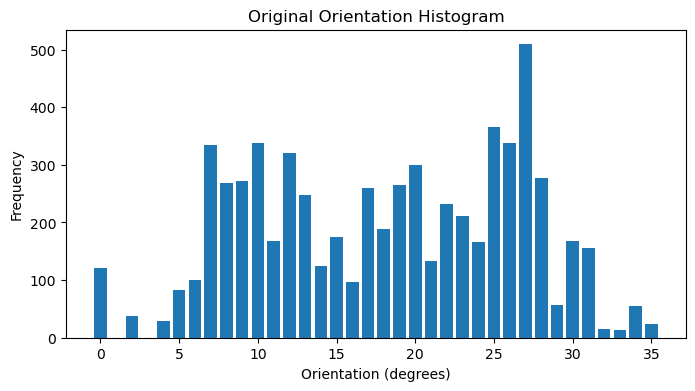

Dominant Orientation (in degrees): 270°
Gradient Orientation Histogram After Rotation:


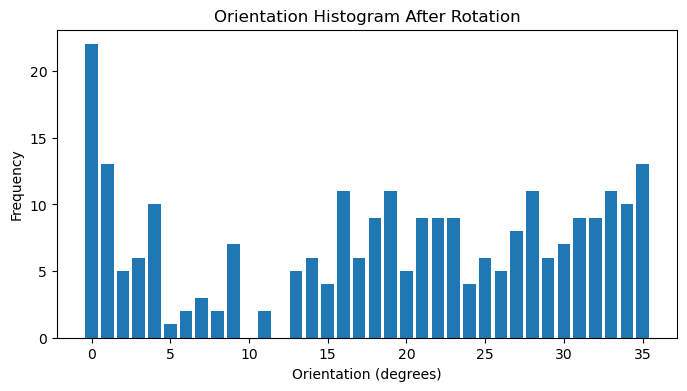

8-bin Orientation Histograms for each 4x4 sub-block:


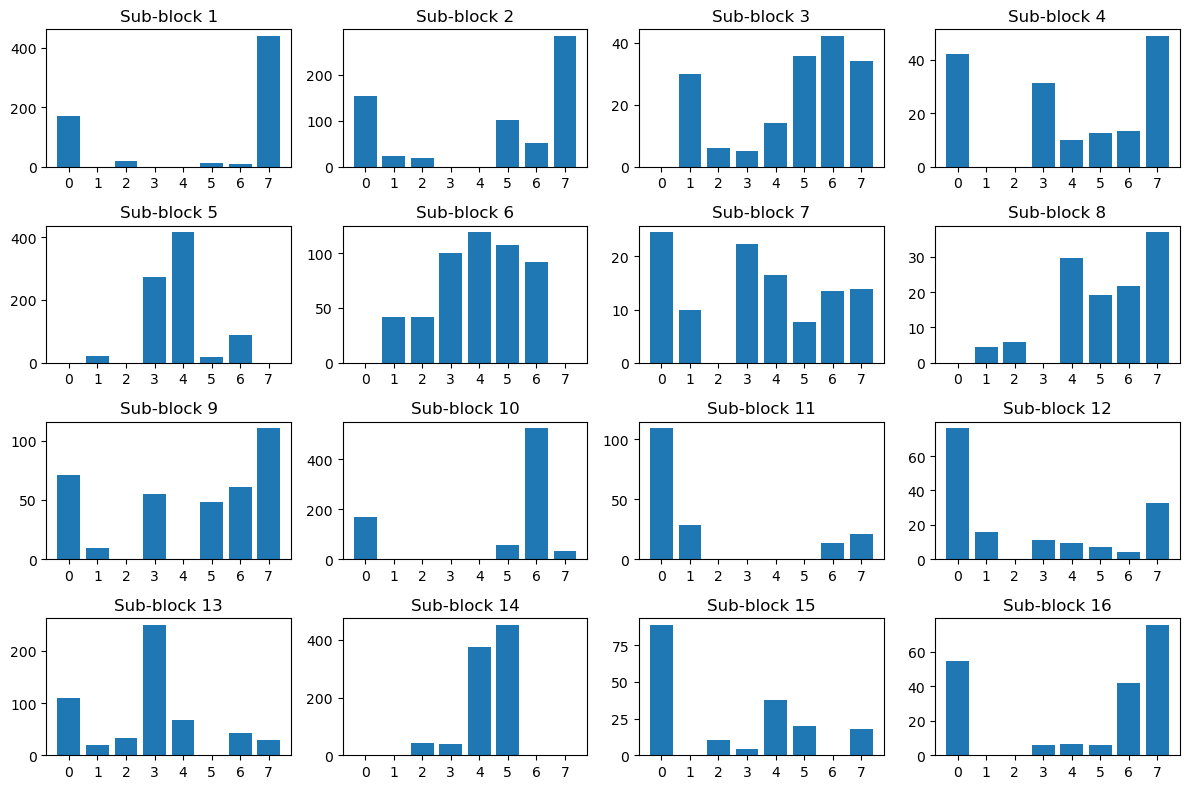

128-element Descriptor Vector:
[0.20055583 0.         0.02152085 0.         0.         0.01361098
 0.01167132 0.28285005 0.17987767 0.02640918 0.02113766 0.
 0.         0.11745891 0.05916795 0.28285005 0.         0.03484435
 0.00700279 0.00595123 0.01633985 0.04168589 0.04918297 0.0395976
 0.04910323 0.         0.         0.03657073 0.01147402 0.01476318
 0.01557564 0.05715403 0.         0.02609786 0.         0.28285005
 0.28285005 0.0200801  0.10462123 0.         0.         0.04825516
 0.04854499 0.11708608 0.1389246  0.12557652 0.1073853  0.
 0.02868657 0.01155402 0.         0.02603817 0.01922516 0.00891037
 0.01565872 0.01629196 0.         0.00521957 0.00700279 0.
 0.03452314 0.02237336 0.02552972 0.04318471 0.08260418 0.01056883
 0.         0.06456504 0.         0.05580819 0.0710514  0.12893652
 0.19530802 0.         0.         0.         0.         0.06735069
 0.28285005 0.03565623 0.12754759 0.03301148 0.         0.
 0.         0.         0.0157979  0.02477293 0.08886026 0.018156

In [115]:
def compute_descriptor(corner, magnitude, orientation):
    x, y = corner
    hist_bins = 36  
    window_size = 16 
    sub_window_size = 4  

    half_size = window_size // 2
    mag_window = magnitude[max(0, y-half_size):y+half_size, max(0, x-half_size):x+half_size]
    ori_window = orientation[max(0, y-half_size):y+half_size, max(0, x-half_size):x+half_size]
    
    if mag_window.shape != (window_size, window_size):
        return None  

    hist, _ = np.histogram(ori_window, bins=hist_bins, range=(0, 360), weights=mag_window)

    dominant_orientation = np.argmax(hist)

    rotated_ori_window = (ori_window - dominant_orientation * 10) % 360

    descriptor = []
    sub_histograms = []  
    for i in range(0, window_size, sub_window_size):
        for j in range(0, window_size, sub_window_size):
            sub_ori = rotated_ori_window[i:i+sub_window_size, j:j+sub_window_size]
            sub_mag = mag_window[i:i+sub_window_size, j:j+sub_window_size]
            sub_hist, _ = np.histogram(sub_ori, bins=8, range=(0, 360), weights=sub_mag)
            descriptor.extend(sub_hist)
            sub_histograms.append(sub_hist)  
    descriptor = np.array(descriptor)
    descriptor = descriptor / np.linalg.norm(descriptor)  
    descriptor = np.clip(descriptor, 0, 0.2)  
    descriptor = descriptor / np.linalg.norm(descriptor)  
    return descriptor, hist, rotated_ori_window, sub_histograms  


descriptors = []
for corner in corners:
    descriptor = compute_descriptor(corner, magnitude, orientation)
    if descriptor is not None:
        descriptors.append(descriptor)

if len(corners) > 0:
    corner = corners[0]  
    descriptor, hist, rotated_ori_window, sub_histograms = compute_descriptor(corner, magnitude, orientation)

    print("Original Gradient Orientation Histogram for one corner:")
    plt.figure(figsize=(8, 4))
    plt.bar(range(36), hist)
    plt.title("Original Orientation Histogram")
    plt.xlabel("Orientation (degrees)")
    plt.ylabel("Frequency")
    plt.show()

    dominant_orientation = np.argmax(hist) * 10  
    print(f"Dominant Orientation (in degrees): {dominant_orientation}°")

    rotated_hist, _ = np.histogram(rotated_ori_window, bins=36, range=(0, 360))
    print("Gradient Orientation Histogram After Rotation:")
    plt.figure(figsize=(8, 4))
    plt.bar(range(36), rotated_hist)
    plt.title("Orientation Histogram After Rotation")
    plt.xlabel("Orientation (degrees)")
    plt.ylabel("Frequency")
    plt.show()

    print("8-bin Orientation Histograms for each 4x4 sub-block:")
    plt.figure(figsize=(12, 8))
    for i, sub_hist in enumerate(sub_histograms):
        plt.subplot(4, 4, i + 1)
        plt.bar(range(8), sub_hist)
        plt.title(f"Sub-block {i+1}")
        plt.xticks(range(8))
    plt.tight_layout()
    plt.show()

    print("128-element Descriptor Vector:")
    print(descriptor)

    descriptor_normalized = descriptor / np.linalg.norm(descriptor)  
    print("Normalized Descriptor (128 elements):")
    print(descriptor_normalized)

else:
    print("No corners detected.")

**Problem 5: Feature Matching**
In this problem, you will match the SIFT-like descriptors you found in Problem 4 across two images. Use 
an existing Harris corner detector (e.g., from OpenCV or Scikit packages) and extract Harris corners in 
the images named “image1” and “image2” provided in homework material. Recall, that your corner 
detector parameters should be set so that you get at least 50 corners for each image. It is okay to ignore 
corners around the image borders, for which you don’t get SIFT descriptors. 
- Find corners & compute your SIFT-like descriptors using Problem 4. 
- Calculate the (L2 norm) distance between all pairs of descriptors across the two images (much 
like scipy.spatial.distance.cdist(), but your own implementation).  
- Match each keypoint in image1 to a keypoint in image2 based on closest distance 
- Match each keypoint in image2 to a keypoint in image1 based on closest distance 
- Explain: did you get the same matchings from image1 to image2 and vice versa? If yes, do you 
think that will always be the case? If no, explain why they can be different. 
- Find keypoints that matched bi-directionally across image1 and image2  
- Display the results: show images side-by-side, display the keypoints on each image, and display 
the matchings with a line across images. Example: 
- Explain: Are all keypoints matched correctly across the 2 images? If yes, will that always be the 
case? If no, why wrong matching happens? 
- Now, repeat the matching from image1 to image2 by computing the distance of closest (NN1) 
and second-closest (NN2) keypoints, and computing the Lowe’s ratio (NN1/NN2).  
- Discard matchings that have Lowe’s ratio > 0.7 
- Repeat above for image2 to image1, and keep keypoints/matchings that are bi-directional 
- Display the results: show images side-by-side, display the keypoints on each image, and display 
the matchings with a line across images. 
- Explain: What is the difference between previous results and the results with Lowe’s ratio? 
**Note:**
- See the details in lecture “06_1_Feature_Matching”. 

In [56]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image2 = cv.imread('image2.jpg', cv.IMREAD_GRAYSCALE)

def harris_corner_detection(image, threshold=0.1):
    dst = cv.cornerHarris(image, 2, 3, 0.04)
    dst = cv.dilate(dst, None)
    corners = np.argwhere(dst > threshold * dst.max())
    return corners

corners2 = harris_corner_detection(image2)

Ix = cv.Sobel(image2, cv.CV_64F, 1, 0, ksize=3)
Iy = cv.Sobel(image2, cv.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(Ix**2 + Iy**2)
orientation = np.arctan2(Iy, Ix) * (180.0 / np.pi) % 360


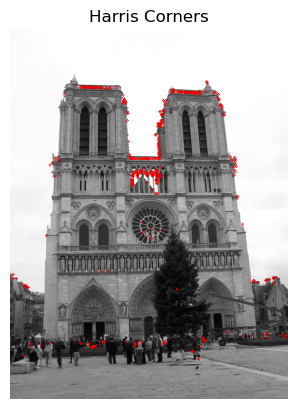

In [57]:
plt.imshow(image2, cmap='gray')
y_corners2, x_corners2 = zip(*corners2)  
plt.scatter(x_corners2, y_corners2, c='r', s=.005)  

plt.title('Harris Corners')
plt.axis('off') 
plt.show()

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_75316/4119295584.py:30: RuntimeWarning: invalid value encountered in divide
  descriptor = descriptor / np.linalg.norm(descriptor)


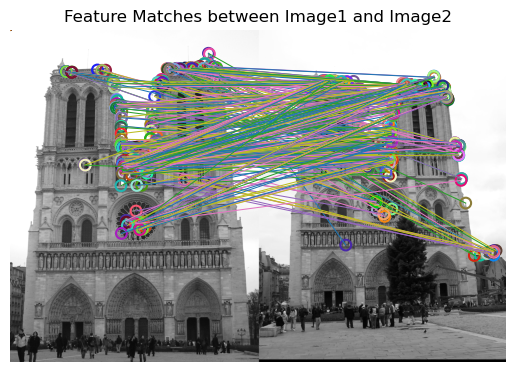

In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image1 = cv.imread('image1.jpg', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('image2.jpg', cv.IMREAD_GRAYSCALE)


corners1 = harris_corner_detection(image1)
corners2 = harris_corner_detection(image2)

descriptors1 = [compute_descriptor(corner, magnitude, orientation) for corner in corners1 if compute_descriptor(corner, magnitude, orientation) is not None]
descriptors2 = [compute_descriptor(corner, magnitude, orientation) for corner in corners2 if compute_descriptor(corner, magnitude, orientation) is not None]

def l2_distance(descriptor1, descriptor2):
    return np.sqrt(np.sum((descriptor1 - descriptor2) ** 2))

matches_from_1_to_2 = []
for idx1, desc1 in enumerate(descriptors1):
    min_dist = float('inf')
    match_idx = -1
    for idx2, desc2 in enumerate(descriptors2):
        dist = l2_distance(desc1, desc2)
        if dist < min_dist:
            min_dist = dist
            match_idx = idx2
    matches_from_1_to_2.append((idx1, match_idx, min_dist))

matches_from_2_to_1 = []
for idx2, desc2 in enumerate(descriptors2):
    min_dist = float('inf')
    match_idx = -1
    for idx1, desc1 in enumerate(descriptors1):
        dist = l2_distance(desc2, desc1)
        if dist < min_dist:
            min_dist = dist
            match_idx = idx1
    matches_from_2_to_1.append((idx2, match_idx, min_dist))

bidirectional_matches = []
for match1 in matches_from_1_to_2:
    idx1, idx2, dist1 = match1
    if matches_from_2_to_1[idx2][1] == idx1:
        bidirectional_matches.append((idx1, idx2, dist1))

def pad_images_to_same_height(image1, image2):
    h1, w1 = image1.shape
    h2, w2 = image2.shape
    
    max_height = max(h1, h2)
    
    if h1 < max_height:
        pad_height = max_height - h1
        image1 = np.pad(image1, ((0, pad_height), (0, 0)), mode='constant', constant_values=0)
    
    if h2 < max_height:
        pad_height = max_height - h2
        image2 = np.pad(image2, ((0, pad_height), (0, 0)), mode='constant', constant_values=0)
    
    return image1, image2

def display_matches(image1, image2, corners1, corners2, matches):
    image1, image2 = pad_images_to_same_height(image1, image2)
    
    combined_image = np.hstack((image1, image2))
    
    plt.imshow(combined_image, cmap='gray')
    
    # Offset for corners in the second image
    offset = image1.shape[1]
    
    for idx1, idx2, _ in matches:
        corner1 = corners1[idx1]
        corner2 = corners2[idx2]
        color = np.random.rand(3,) 
        plt.scatter([corner1[1]], [corner1[0]], edgecolor=color, facecolor='none', s=60, linewidth=1.5)  
        plt.scatter([corner2[1] + offset], [corner2[0]], edgecolor=color, facecolor='none', s=60, linewidth=1.5)  
        
        plt.plot([corner1[1], corner2[1] + offset], [corner1[0], corner2[0]], color, linewidth=0.75, )
    
    plt.title('Feature Matches between Image1 and Image2')
    plt.axis('off')
    plt.show()

display_matches(image1, image2, corners1, corners2, bidirectional_matches)


**Explain: did you get the same matchings from image1 to image2 and vice versa? If yes, do you** 

- 

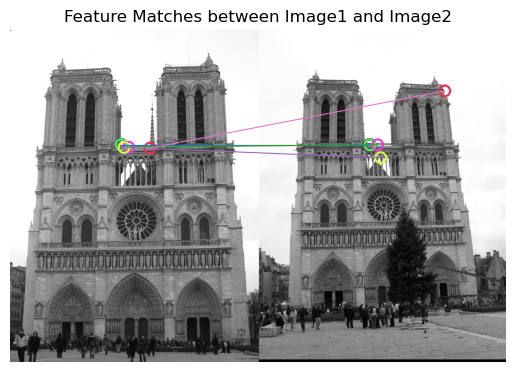

In [63]:
lowes_ratio_threshold = 0.7

def lowes_ratio_match(descriptors1, descriptors2, lowes_ratio_threshold):
    matches = []
    for idx1, desc1 in enumerate(descriptors1):
        distances = []
        for idx2, desc2 in enumerate(descriptors2):
            dist = l2_distance(desc1, desc2)
            distances.append((idx2, dist))
        distances = sorted(distances, key=lambda x: x[1])
        
        best_match_idx, best_dist = distances[0]
        second_best_dist = distances[1][1] if len(distances) > 1 else float('inf')
        
        if best_dist / second_best_dist < lowes_ratio_threshold:
            matches.append((idx1, best_match_idx, best_dist))
    
    return matches

matches_from_1_to_2_lowes = lowes_ratio_match(descriptors1, descriptors2, lowes_ratio_threshold)
matches_from_2_to_1_lowes = lowes_ratio_match(descriptors2, descriptors1, lowes_ratio_threshold)

bidirectional_matches_lowes = []
for match1 in matches_from_1_to_2_lowes:
    idx1, idx2, dist1 = match1
    if any(match[0] == idx2 and match[1] == idx1 for match in matches_from_2_to_1_lowes):
        bidirectional_matches_lowes.append((idx1, idx2, dist1))

display_matches(image1, image2, corners1, corners2, bidirectional_matches_lowes)


**Explain: What is the difference between previous results and the results with Lowe’s ratio?**

-